# Домашнее задание №2


Перед вами датасет с данными о вреде курения


Структура данных:

1. **gender**: Пол пациента
2. **age**: Возраст пациента
3. **hypertension**: Наличие гипертонии у пациента 1 - есть, 0 - не наблюдалось
4. **heart_disease**: Наличие у пациента болезней связанных с сердцем 1 - есть, 0 - здоров
5. **ever_married**: Брак - (Состоял в браке/ холост)
6. **work_type**: Работ - Ребенок(children), Госслужащий(Govt_jov), Никогда не работал(Never_worked), Самозанятый(self-employed) или Скрыто(private)
7. **Residence_type**: место работы городская среда(Urban)/удаленка или за городом(Rural)
8. **avg_glucose_level**: средний уровень глюкозы в крови
9. **bmi**: индекс массы тела
10. **smoking_status**: Пациент курит(Иногда, всегда, время от времени или Unknown - неизвестно)
11. **stroke**: Перенесенный инсульт (1 - пациент перенес инсульт, 0 - инсульта не было) - *ваш target*

## Ваша задача

№1 Восстановить целостностью данных, реализовать функцию позволяющие выполнять заполнение данных по среднему или по медианному значению в Series. 

1.  Заполнить пропуски
2.  Убрать дубликаты
3.  Убрать некорректные данные и.т.п.


№2 Построить baseline-модель, попытаться выбить лучший скор (сравнить несколько моделей)

№3 Сделать визуализацию для мини-исследования о вреде курения с разбивкой по половой принадлежности пациентов с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [49]:
url = 'https://drive.google.com/file/d/1He5GI5_Gd8uXYfeETLBISQ5BszX0o4pU/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url,names=['index','gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'])
data = data.drop('index',axis=1)

In [50]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1
5,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
6,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
8,Male,74.0,1.0,1.0,Yes,NaN,Rural,70.09,NaN,never smoked,1
9,Female,69.0,0.0,NaN,No,Private,Urban,94.39,22.8,never smoked,1


In [51]:
data = data.drop_duplicates().drop(index=[0]).reset_index(drop=True)

In [5]:
encoder = OrdinalEncoder()
columns = data.drop(['age', 'avg_glucose_level', 'bmi'], axis=1).columns
data[columns] = pd.DataFrame(encoder.fit_transform(data[columns]), columns=columns)

In [29]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,28.1,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,28.1,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,1.0,105.92,32.5,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.4,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.0,2.0,1.0
5,1.0,81.0,0.0,0.0,1.0,2.0,1.0,186.21,29.0,1.0,1.0
6,1.0,74.0,1.0,1.0,1.0,2.0,0.0,70.09,28.1,2.0,1.0
7,0.0,69.0,0.0,0.0,0.0,2.0,1.0,94.39,22.8,2.0,1.0
8,0.0,59.0,0.0,0.0,1.0,2.0,0.0,76.15,28.1,0.0,1.0
9,0.0,78.0,0.0,0.0,1.0,2.0,1.0,58.57,24.2,0.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5106 non-null   float64
 1   age                4963 non-null   object 
 2   hypertension       4903 non-null   float64
 3   heart_disease      4282 non-null   float64
 4   ever_married       5106 non-null   float64
 5   work_type          4773 non-null   float64
 6   Residence_type     4302 non-null   float64
 7   avg_glucose_level  4622 non-null   object 
 8   bmi                4167 non-null   object 
 9   smoking_status     5106 non-null   float64
 10  stroke             5106 non-null   float64
dtypes: float64(8), object(3)
memory usage: 438.9+ KB


In [8]:
def my_fill_na(data):
    for i in data.columns:
        data[i] = data[i].astype('float').fillna(data[i].median())
    return data

In [9]:
data = my_fill_na(data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5106 non-null   float64
 1   age                5106 non-null   float64
 2   hypertension       5106 non-null   float64
 3   heart_disease      5106 non-null   float64
 4   ever_married       5106 non-null   float64
 5   work_type          5106 non-null   float64
 6   Residence_type     5106 non-null   float64
 7   avg_glucose_level  5106 non-null   float64
 8   bmi                5106 non-null   float64
 9   smoking_status     5106 non-null   float64
 10  stroke             5106 non-null   float64
dtypes: float64(11)
memory usage: 438.9 KB


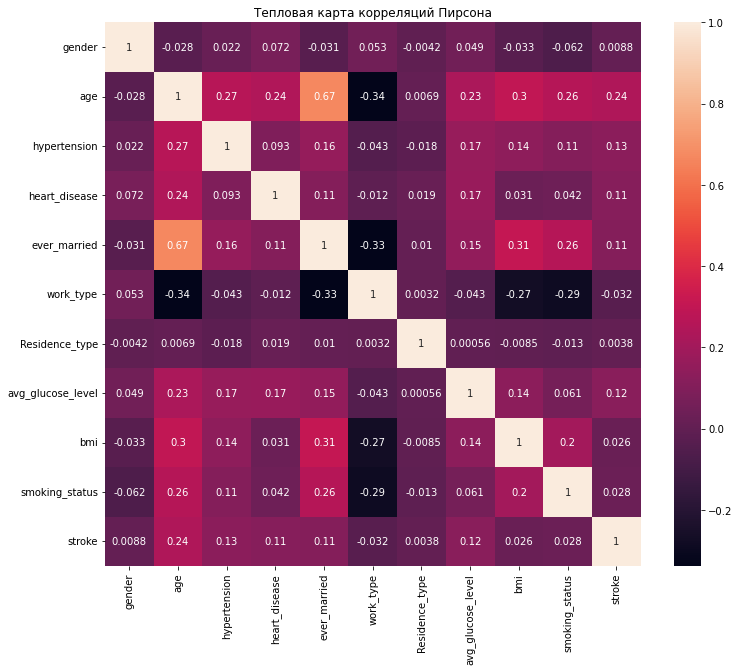

In [11]:
plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Тепловая карта корреляций Пирсона')
plt.show()

Сильной корреляции между инсультом и другими признаками не наблюдается

In [12]:
data['stroke'].value_counts()

0.0    4857
1.0     249
Name: stroke, dtype: int64

Так как выборки класса 1 почти в 20 раз меньше, увеличим ее в два раза и уменьшим выбору класса 0

In [13]:
over = RandomOverSampler(sampling_strategy=0.103)
X, y = over.fit_resample(data.drop('stroke', axis=1), data['stroke'])
under = RandomUnderSampler()
X, y = under.fit_resample(X, y)

In [14]:
y.value_counts()

0.0    500
1.0    500
Name: stroke, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [21]:
clf_GB = GradientBoostingClassifier()
clf_GB.fit(X_train, y_train)
y_pred = clf_GB.predict(X_test)
print('accuracy score = ', accuracy_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred))

accuracy score =  0.768
precision =  0.75177304964539
recall =  0.8217054263565892
f1 =  0.7851851851851851


In [22]:
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, y_train)
y_pred = clf_RF.predict(X_test)
print('accuracy score = ', accuracy_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred))

accuracy score =  0.808
precision =  0.7793103448275862
recall =  0.875968992248062
f1 =  0.8248175182481752


In [28]:
params = {'n_estimators': range(10, 300, 20), 'max_depth': range(3, 20, 2)}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
print('accuracy score = ', accuracy_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred))

accuracy score =  0.82
precision =  0.795774647887324
recall =  0.875968992248062
f1 =  0.8339483394833949
